<a href="https://colab.research.google.com/github/GaneshkumarPatel/cohort_kaimur-capstone_eda_project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **INTRODUCTION :**

Mobile Applications are an integral part of our daily lives. As they are easy to create and are lucrative, it becomes essential to do comprehensive analysis of play store app data and understand the demand of users.

Thus, in this colab notebook we have tried our level best to do all possible analysis and bring out some insights from the data to devise strategies for growth and retention.

The flow of analyzing the dataset will be as follows:

1. **Problem Comprehension:** It involves loading the dataset and do a logical analysis of variables.
2. **Data Exploration:** Exploring the data using head, tail, info and describe.
3. **Data Cleaning:** Looking for and handling NaN/Null/Missing values.
4. **Extracting Statistics:** Finding the key statistical values to fill up the missing values and making important insights.
5. **Exploratory analysis:** Getting some conclusion from the given dataset, finding correlation and trends that fulfills the purpose of analysis.
6. **Data Visualization:** Visualizing the analysis with various graphs such as Histograms, Line chart, Pi chart, Boxplot etc.
7. **Conclusion** 

*So, Let's begin with the Loading of Dataset for Exploratory Data Analysis.*




In [8]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Defining working path

working_path='/content/drive/MyDrive/Colab Notebooks/almabetter/capstone/1. EDA google play store/'

In [11]:
# Loading csv files required for EDA
#Here we have assumed that our first dataset i.e **Playstore dataset is df1** while **review dataset is df2** 

df1=pd.read_csv(working_path +'Play Store Data.csv')
df2=pd.read_csv(working_path +'User Reviews.csv')

In [12]:
# Looking for different columns

df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#**Dataset Description**
#A. Play store Dataset

This file contains data of the Play store applications. It contains 10,841 rows of data with different application names and following columns:



**App**: It defines names of different applications to be reviwed.

**Category:** Category of the application it belongs to such as family, game, beauty, business, entertainment, education...etc.

**Rating:** Overall user rating of the application. The users have rated the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews:** The number of user reviews each app has received.

**Size:** The memory size needed to install the application.

**Installs:** The number of times each application has been installed by users.

**Type:** Tells about the Free or paid version of the app.

**Price:** Notifies the price of the app.

**Content Rating:** This column specifies the intended audience of the app such as teens, mature 21+, or everyone.

**Genres:** The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

**Last Updated:** Release date of the most recent update for the app.

**Current Ver:** The app's current version.

**Android Ver:** The oldest version of Android OS supported by the app.

#B. Review Dataset
This dataset contains the result of the sentiment analysis. It has 64,295 rows of data with the following additional attributes: 

**App:** Name of the applications.

**Translated_Review:** Either the original review in English, or a translated version if the orignal review is in another language. 

Moreover, the text in each review was pre-processed and attributed with three new features:

**Sentiment:** The result of the sentiment analysis conducted on a review dataset. The value is either Positive, Neutral, or Negative. In this, the text in each review has been pre-processed and attributed with three new features

**Sentiment_Polarity:** Sentiment polarity is a value indicating the positivity or negativity of the sentiment. It ranges from -1 (most negative) to 1 (most positive).

**Sentiment_Subjectivity:** Sentiment Subjectivity is a value ranging from 0 to 1, which indicates the subjectivity of the review. Here, lower values indicate the review which is based on factual information, and higher values indicate the review that is based on personal opinions, public opinions or judgements.


*Now, once we had a close look on our variables and understood the meaning of each, it is required to explore the data so that we can performing some cleaning if required.*



# **Dataset Exploration**
Exploring the df1 using head, tail, info and describe.

In [13]:
# Looking at the initial five rows of our first dataset

df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
# Looking at last 5 rows of our dataset

df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [15]:
# Checking Number of columns and rows

df1.shape

(10841, 13)

In [16]:
# Looking for info

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can see from the information above, that only one column i.e **'rating'**, belongs to numerical data type while others are categorical or object data type. 

Thus, one of our task will be to convert few more columns such as **'reviews', 'size', 'installs' and 'price'** to numerical type so that we can perform statistical analysis on them to get some insights.

In [17]:
# Describing the numerical data of our first dataset. 

df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


We can see here, that we have only one numerical type column with its statistical values.

# **Data Cleaning**

It is a crucial step which includes:


*   Dropping Duplicates
*   Finding NaN, Nulls and missing values
* Validating data to a standard pattern

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns are making their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [18]:
# Droping duplicate values

df1.drop_duplicates(inplace=True,ignore_index=True)
df1.reset_index(inplace=True,drop=True)

In [19]:
# Define a function to get more info from any dataset at once.

def infodata(df):
  infodf=pd.DataFrame()
  infodf['Columns']=df.columns
  infodf['count_of_NaN_values']=df.isnull().sum().values
  infodf['unique_number_of_daata']=df.nunique().values
  infodf['datatype']=df.dtypes.values
  return infodf

In [20]:
# Checking more info using defined function

infodata(df1)

,Columns,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,9660,object
1,Category,0,34,object
2,Rating,1465,40,float64
3,Reviews,0,6002,object
4,Size,0,462,object
5,Installs,0,22,object
6,Type,1,3,object
7,Price,0,93,object
8,Content Rating,1,6,object
9,Genres,0,120,object


From above it is clear that in our dataset **'Rating'** column contains 1465 null values and **'Content Rating'**, **'Current Ver'**, **'Android Ver'** columns contains comparatively small amount of nulls.

Thus, now we will try to remove or replace those values in best possible way.

In [21]:
# Finding nulls in 'content rating' column

df1[df1['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
# Dropping row of NaN in 'Content Rating'

df1.drop(df1.index[9990],axis=0,inplace=True)

In [23]:
# Filling na values using fillna method

df1.Rating.fillna(df1.Rating.median(),inplace=True)

In [24]:
# Converting KB to MB 

df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(x))


In [25]:
# Replacing '+',',' with '' in 'Installs' to convert its data type

df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)

In [26]:
# Replacing '$' with '' in 'Price' to convert its data type

df1["Price"] = df1["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

In [27]:
# Converting 'Reviews', 'Installs', 'Size', 'Price' to numerical data type

df1['Reviews']=pd.to_numeric(df1['Reviews'])
df1['Installs']=pd.to_numeric(df1['Installs'])
df1['Size']=pd.to_numeric(df1['Size'])
df1['Price']=pd.to_numeric(df1['Price'])

In [28]:
# Getting statitical values of numerical columns.

df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10357.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,21.287413,1.415776e+07,1.030800
std,0.485594,2.696778e+06,22.540591,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,4.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# Now, we can see we have all five columns with numerical datatype.

In [29]:
# Replacing na values in size with the its median value. 

df1.Size.fillna(df1.Size.median(),inplace=True)

In [30]:
# As we already know that users mostly prefer current version to take max. advantage, therefore we are dropping the 'Current Ver','Android Ver' columns.

df1.drop(['Current Ver','Android Ver'],axis=1,inplace=True)
df1.dropna(inplace=True)

In [31]:
# Calling the function infodata defined above

infodata(df1)

,Columns,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,9658,object
1,Category,0,33,object
2,Rating,0,39,float64
3,Reviews,0,6001,int64
4,Size,0,459,float64
5,Installs,0,20,int64
6,Type,0,2,object
7,Price,0,92,float64
8,Content Rating,0,6,object
9,Genres,0,119,object


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Our dataset is now **cleaned** and thus we can now start with **data analysis through visualization.**

In [33]:
# Getting the statistical info about the numerical data

df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10356.000000,1.035600e+04,10356.000000,1.035600e+04,10356.000000
mean,4.203727,4.059438e+05,20.067028,1.415913e+07,1.030900
std,0.485617,2.696905e+06,21.020893,8.024331e+07,16.279408
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.300000,1.683000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.643825e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **Exploratory Analysis**

We will perform analysis through our five **KPIs (Key Performance Indicators)** i.e **'Rating', 'Reviews', 'Size', 'Installs' and 'Price'.** The analysis will be based on 


*   **Univariate study-** Study of dependent variables such as 'Rating', 'Reviews', 'Size', 'Installs' and 'Price'
*   **Multivariate study-** Study of multivariables and corelation between them




# **Exploring 'Categories' of Apps**

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:



* Which top 3 category shares more number of apps?
* Which are the top 25 categories comprising maximum paid and free apps?
* Which are the top 3 most expensive categories of apps?
* Which categories of apps are less popular? 

#  Which top 3 category shares more number of apps?

In [34]:
# no. of unique categories present 

df1.Category.value_counts()

FAMILY                 1942
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

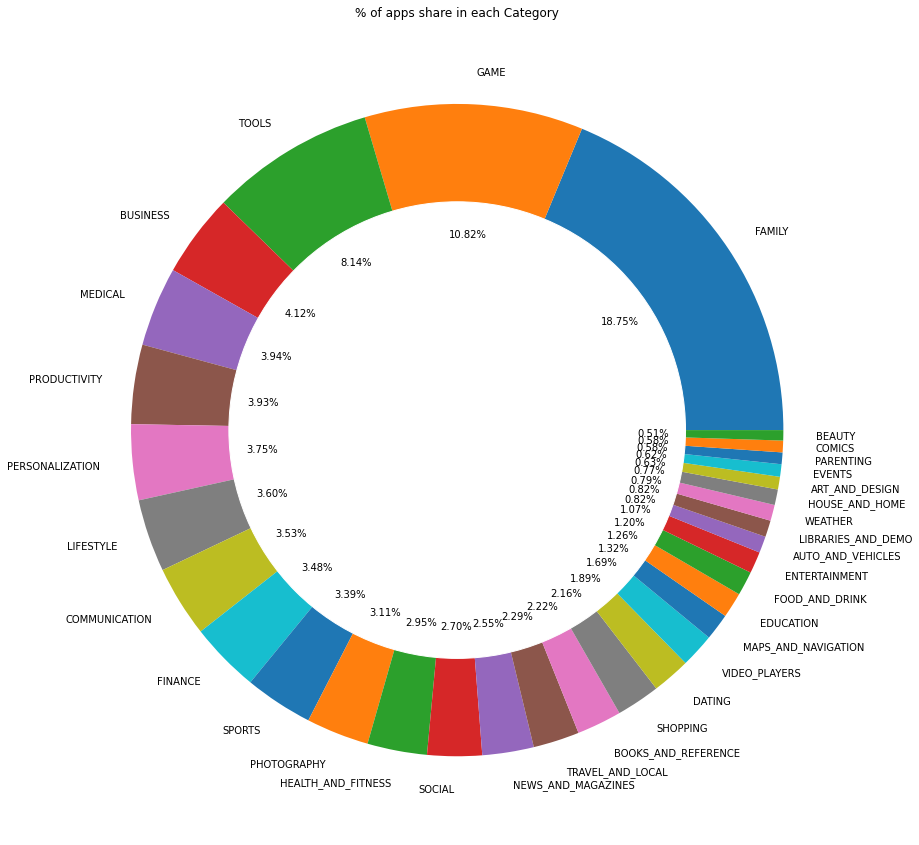

In [35]:
# Showing Unique categories and their % ratio among all present categories

plt.figure(figsize=(20,15))

plt.pie(df1.Category.value_counts(), labels=df1.Category.value_counts().index , autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category')
plt.show()

## From the above univariate study i.e doughnut chart we can conclude that there are greater number of apps related to categories:

*   Family- 18.75%
*   Game- 10.82%
* Tools-8.14%



## Which are the top 25 categories comprising maximum paid and free apps?

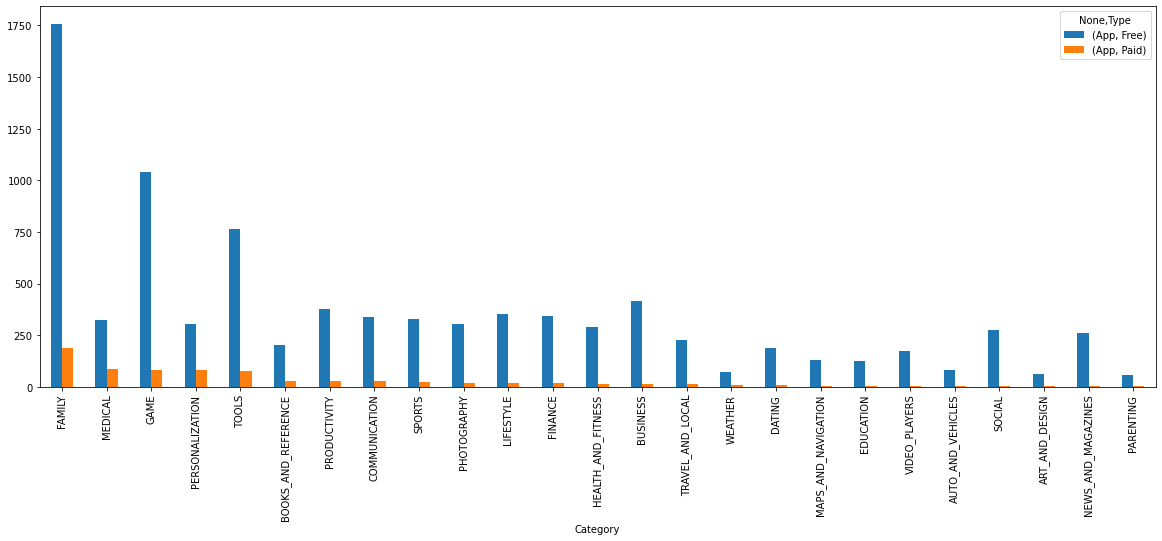

In [36]:
# Counting and plotting number of apps vs categories

app_count_by_category_sorted_by_paid=df1.groupby(['Category','Type'])[['App']].count().unstack().sort_values(by=[('App', 'Paid')],ascending=False).head(25)
app_count_by_category_sorted_by_paid.plot(kind='bar',stacked=False, figsize=(20,7))

# Which are the top three most expensive categories of apps?

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.



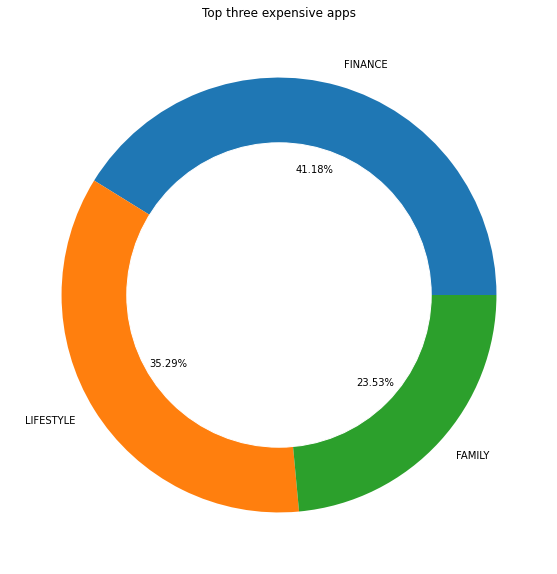

In [37]:
# Finding category of top three most expensive apps

expensive_apps=df1[df1.Price>200]
plt.figure(figsize=(20,10))

plt.pie(expensive_apps.Category.value_counts(),labels=expensive_apps.Category.value_counts().index, autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top three expensive apps')
plt.show()

### The top three most expensive apps are related to following categories


*   Finance
*   Lifestyle
* Family



# Which categories of apps are less popular?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

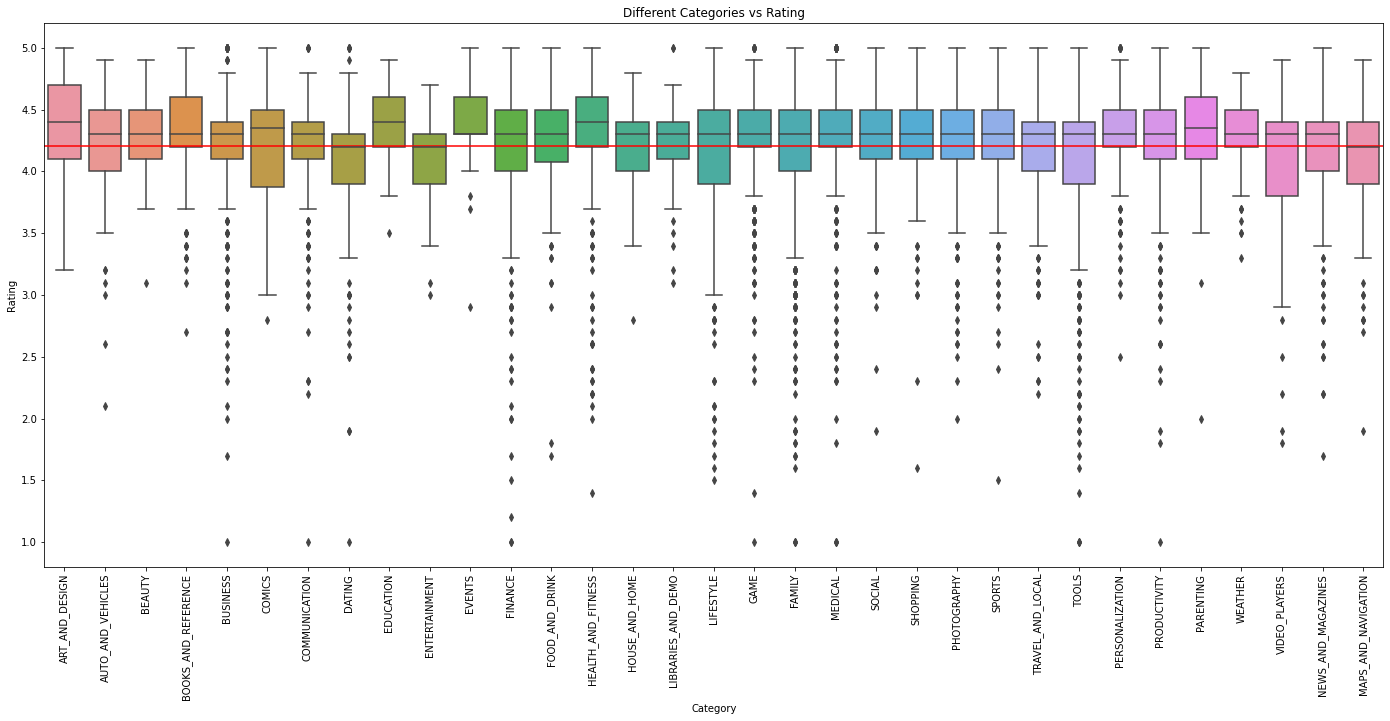

In [38]:
# Boxplot of different Categories vs rating

plt.figure(figsize=(24,10))
val = sns.boxplot(data=df1, x="Category", y="Rating")
val.axhline(df1['Rating'].mean(),ls="-",color="red")
plt.title('Different Categories vs Rating')
plt.xticks(rotation=90)

### The above is the box plot showing variation of rating w.r.t each category of apps. The red line here shows the mean value of the rating i.e 4.3.

### We can see that most of the categories have apps with their avg rating above red line i.e 4.3 while few categories such as dating and entertainment apps are not fondly used and rated by users.


# **Diving into its Genres**

Now, let's dive into the genres of each app and find the user's choice.

## Top 25 genres having maximum number of apps?

In [39]:
# Finding top 25 genres with maximum number of apps

top_25_geners_having_maxx_apps=df1.groupby('Genres')['App'].count().sort_values(ascending=False).head(25)
top_25_geners_having_maxx_apps

Genres
Tools                      842
Entertainment              588
Education                  527
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  372
Communication              366
Sports                     364
Finance                    360
Action                     356
Photography                322
Health & Fitness           306
Social                     280
News & Magazines           264
Travel & Local             236
Books & Reference          230
Shopping                   224
Arcade                     218
Simulation                 199
Dating                     196
Casual                     191
Video Players & Editors    173
Maps & Navigation          137
Name: App, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


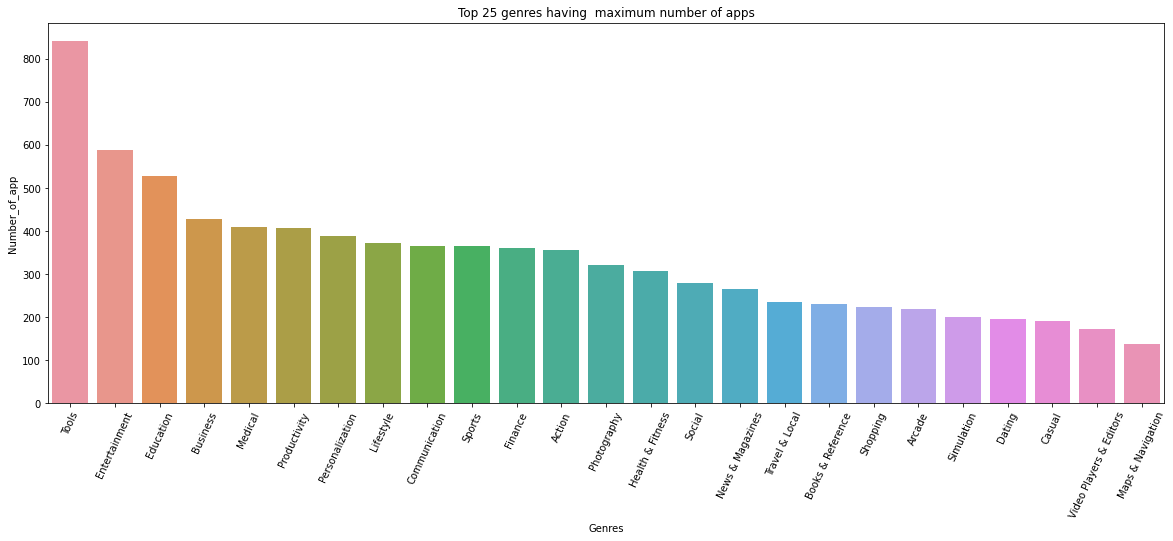

In [40]:
# Plotting genres w.r.t apps

plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number_of_app")
plt.title("Top 25 genres having  maximum number of apps")
sns.barplot(top_25_geners_having_maxx_apps.index,top_25_geners_having_maxx_apps.values)

# Top 25 Genres whose apps are installed the most?

In [41]:
# Counting total number of genres

df1.Genres.nunique()

119

In [42]:
# Finding top 25 Genres on the basis of Installs

top_25_genres_by_install=df1.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


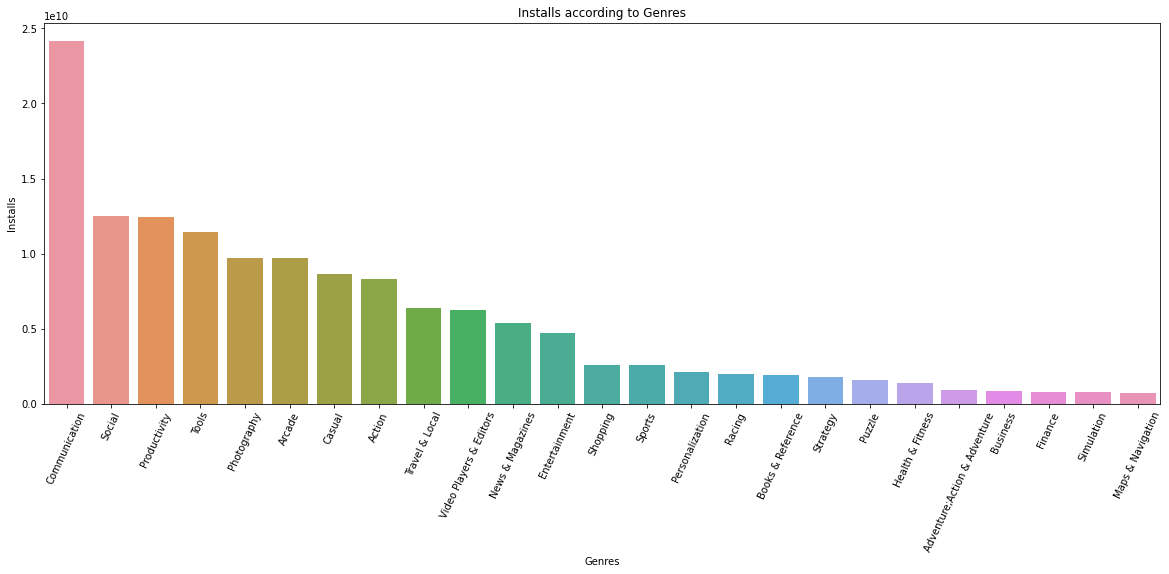

In [43]:
# Plotting histogram of 25 genres vs Installs

top_25_genres_by_install.values
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_25_genres_by_install.index,top_25_genres_by_install.values)

## Top 25 Genres having maximum number of paid and free apps

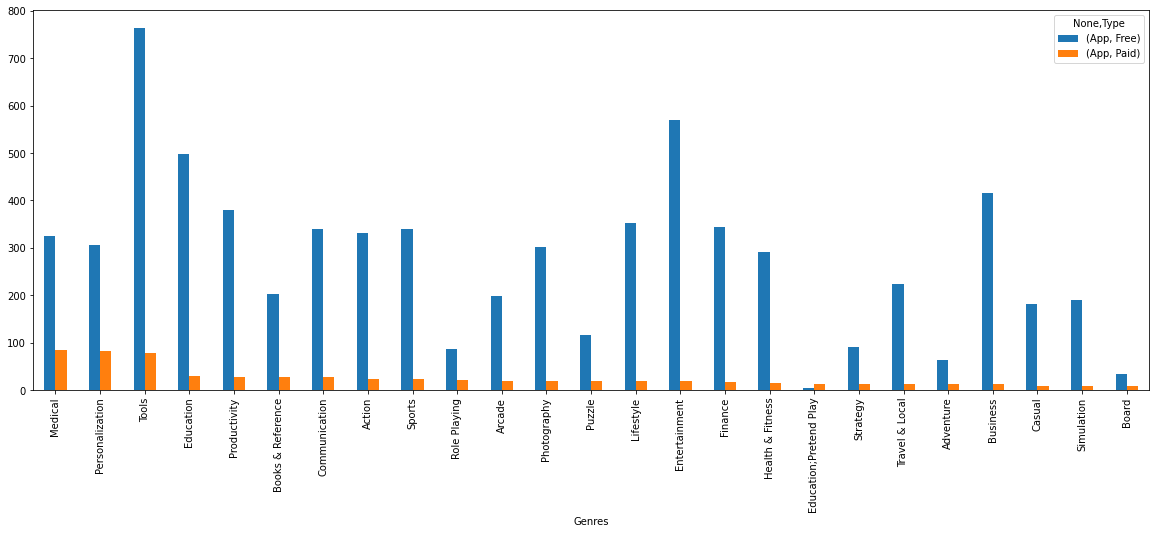

In [44]:
# Counting and plotting genres based on paid and free apps

app_count_by_genres_sorted_by_paid=df1.groupby(['Genres','Type'])[['App']].count().unstack().sort_values(by=[('App','Paid')],ascending=False).head(25)
app_count_by_genres_sorted_by_paid.plot(kind='bar',stacked=False, figsize=(20,7))

# **Study of KPIs through Multivariate plots**

Text(0.5, 1.0, 'Multivariate analysis of five KPIs')

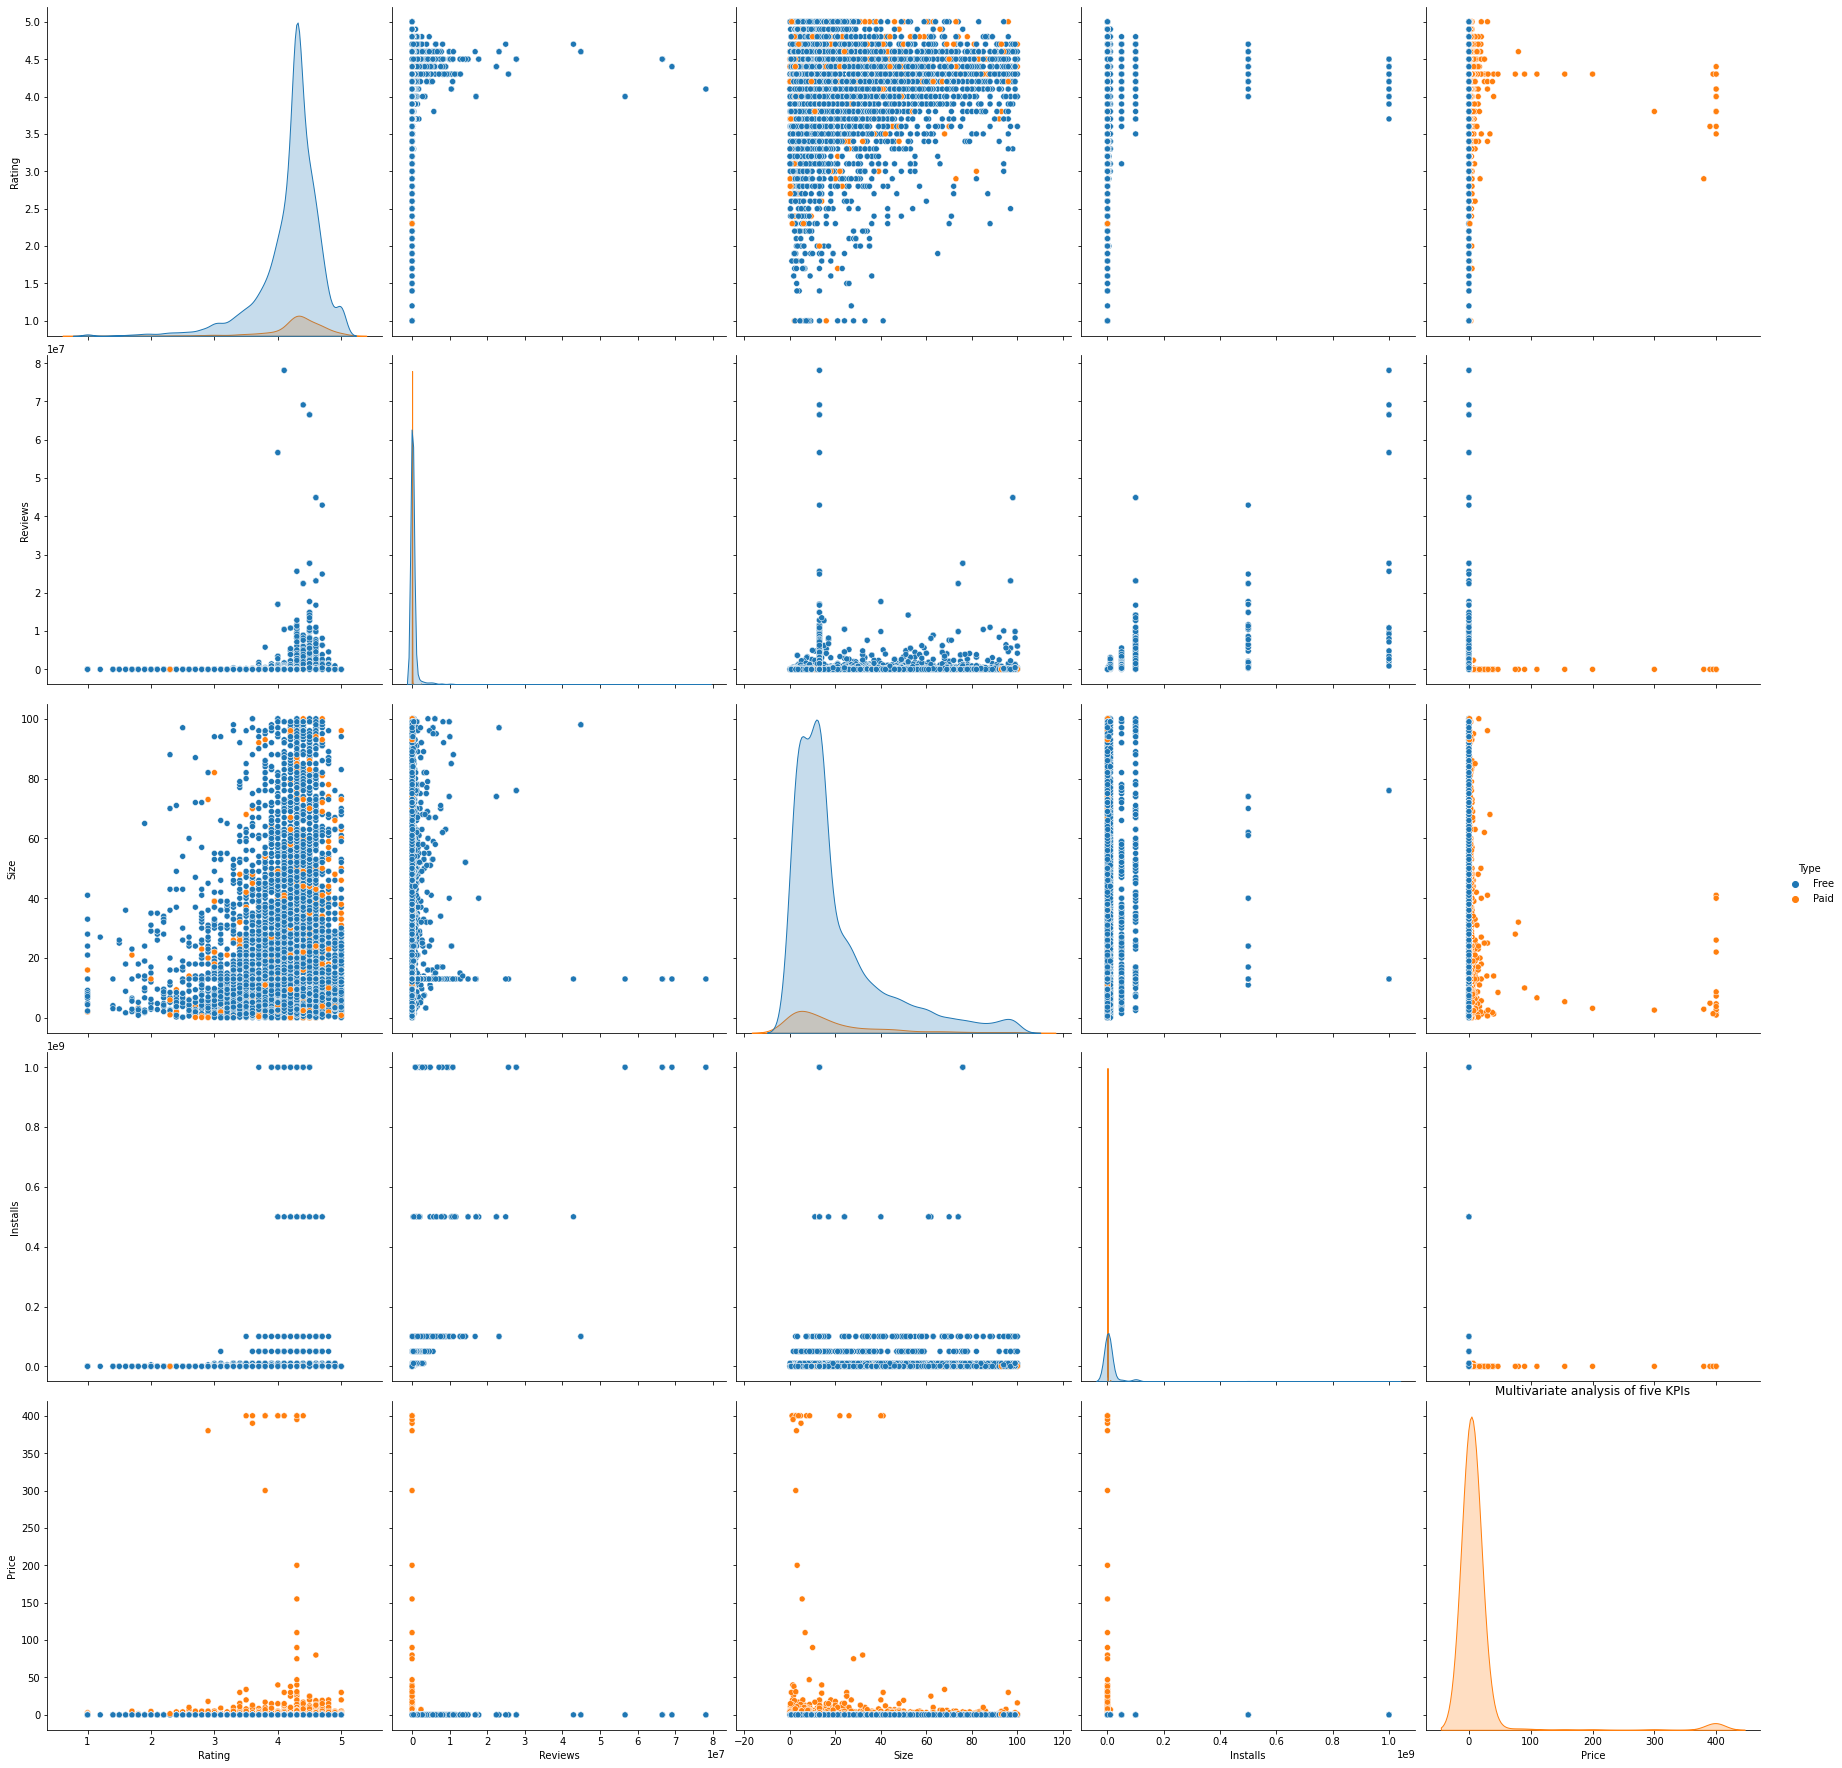

In [45]:
# pairplot to understand multivariate analysis of numeric variables in our dateset

sns.pairplot(df1, hue='Type', height=5)
plt.title('Multivariate analysis of five KPIs')

### The above plot is a matrix of 5x5 graphs where rows and columns both contain **'Rating', 'Reviews', 'Size', 'Installs' and 'Price'.** Here, the blue dots or line represents free users while orange ones represent paid users. 

The self plot or univariate plots present on the diagonals of the above matrix are distribution curves showing peak at the maximum value of each variable. While, the other scatter plots are showing the relation between each of them. Analyzing either rows or columns of this will give us the insight of whole matrix. So, let's discuss some insights from first column starting from above:



1.   *Ist graph*- **Rating vs Rating**- Distribution curve and peak near mode value of Ratings i.e between 4 to 5 and peak at 4.3
2.   *IInd Graph*- **Rating vs Reviews**- Scatter plot here shows that as the Ratings are increasing the number of Reviews are also increasing, whether they are paid or unpaid users.
3. *IIIrd Graph*-**Rating vs Size**- This Scatter plot shows that size of the app is also more of high rated apps.
4. *IVth Graph*- **Rating vs Installs**- It shows that number of installs are more for high Rated apps.
5. *Vth Graph*- **Rating vs Price**- The users have paid highly for good rated apps.

It is also interesting to discover that

*   **users have paid more for lite apps** (graph 5x3/3x5)
* **Users have paid highly for good rated apps and it does not depend on number of reviews** (graph (1x5 & 2x5) or (5x1 & 5x2))

Similarly, we can analyze other graphs as well and can study the relationship between them. After studying the variation of each variable w.r.t others, let's know the correlation between them through **heatmap**.




## **Correlation between KPIs**

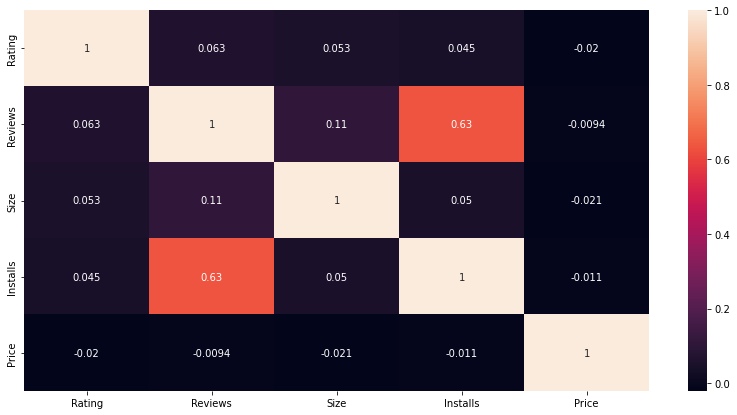

In [46]:
# Finding corelation between each variable

plt.figure(figsize=(14,7))
sns.heatmap(df1.corr(),annot=True)

### The above heatmap shows that


* **Users have installed more apps of the ones having high reviews i.e installs and reviews are highly corelated.**
* **Installs of app doesn't depends on Size i.e. there is no correlation between them**




#Which apps have maximum installs?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


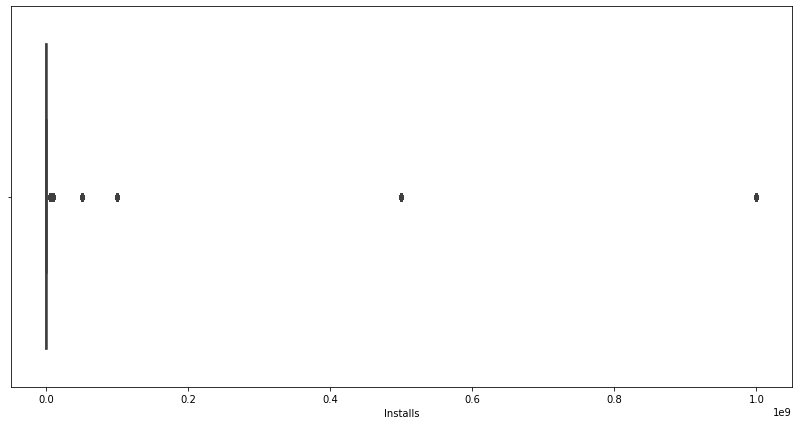

In [47]:
# looking at the distribution of Installed apps

plt.figure(figsize=(14,7))
sns.boxplot(df1.Installs)

It is clear that few apps have installation upto 10^9. So, let's have look on those apps.

In [48]:
# Sorting apps on the basis of installation in descending order

df1[df1.Installs>0.2e09].sort_values(by='Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,13.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018"
2731,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,13.0,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018"
3102,Google Drive,PRODUCTIVITY,4.4,2731211,13.0,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018"
3035,Google Drive,PRODUCTIVITY,4.4,2731171,13.0,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018"
302,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,13.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
3148,Cloud Print,PRODUCTIVITY,4.1,282460,13.0,500000000,Free,0.0,Everyone,Productivity,"May 23, 2018"
383,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018"
3277,MX Player,VIDEO_PLAYERS,4.5,6474426,13.0,500000000,Free,0.0,Everyone,Video Players & Editors,"August 6, 2018"
1669,Temple Run 2,GAME,4.3,8119151,62.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018"


### The above table shows that, few apps are such that they are installed in every mobile and thus their 'Installs' have reached 10^9. Those obvious apps are:

* Google Play Books
* Google Street View
* Google Drive	
* Messenger – Text and Video Chat for Free

Thus, we can conclude that our dataset is working fine and giving correct results.

#Which audience shares maximum number of apps?

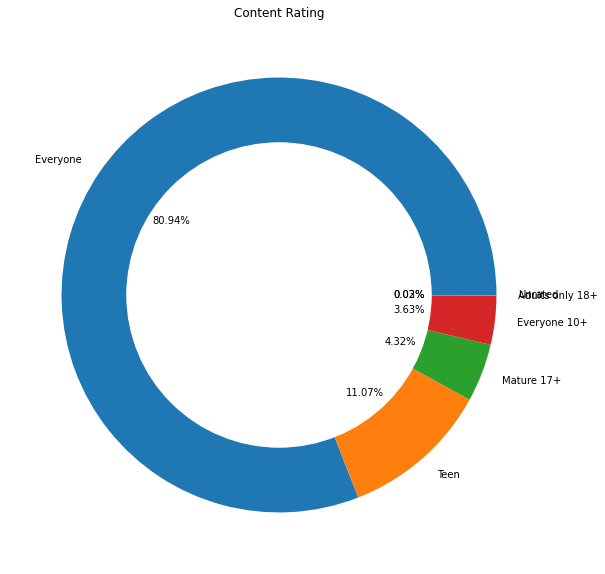

In [49]:
# Grouping and counting apps intended for different type of users

plt.figure(figsize=(18,10))

plt.pie(df1['Content Rating'].value_counts(),labels=df1['Content Rating'].value_counts().index, autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Content Rating')
plt.show()

### From above doughnut chart we can infer that among all apps
*   80.94% of apps are for everyone, while
*   11.07% of apps for Teens and
* 7.99% for others

# **EDA on Review Dataset**
## **Data Exploration**
Exploring the df2 using head, tail, info and describe.

In [50]:
# Dropping duplicates

df2.drop_duplicates(inplace=True)

In [51]:
# Calling function infodata defined above

infodata(df2)

,Columns,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,1074,object
1,Translated_Review,987,27994,object
2,Sentiment,982,3,object
3,Sentiment_Polarity,982,5410,float64
4,Sentiment_Subjectivity,982,4474,float64


In [52]:
# Finding nulls in 'Sentiment' column. AS near about every column has same number of missing value thus we have to close look on dataset to verify it.

df2[df2.Sentiment.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
628,2RedBeans,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64082,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


### After looking at the rows it looks like all columns have NAN values except app name so it's better to drop all rows.

In [53]:
# Dropping rows with NaN values

df2.dropna(inplace=True)

In [54]:
# Resetting index after dropping values

df2.reset_index(inplace=True,drop=True)

In [55]:
# Looking at the info of dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


# Now, once the review dataset is cleaned, we can perform EDA on it.

Mining user review data to determine how people feel about any product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

# Which type of sentiments users generally prefer to give?

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64


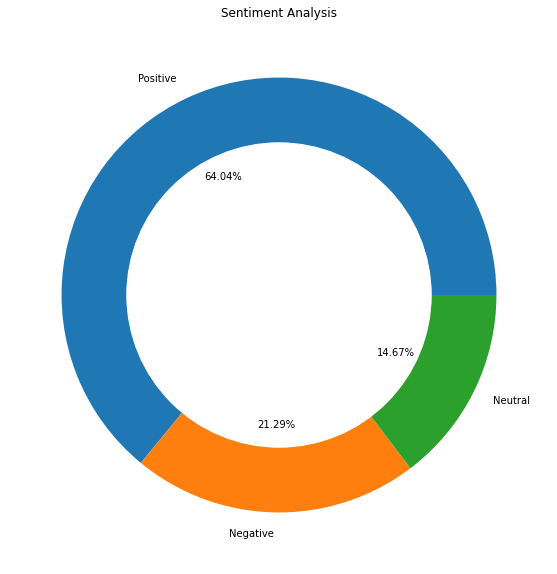

In [56]:
# Counting and plotting different Sentiments in dataset

print(df2.Sentiment.value_counts())
plt.figure(figsize=(20,10))

plt.pie(df2.Sentiment.value_counts(),labels=df2.Sentiment.value_counts().index, autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis')
plt.show()

### From above doughnut chart it is clear that the apps have around 

*   64.04% positive sentiments
*   21.29% Neutral sentiments
* 14.67% Negative sentiments



# Merging the two datasets for more detailed analysis

In [57]:
# merging 'category' and 'type' of df1 with df2 using inner join

merged_df = pd.merge(df2, df1[["App",'Category',"Type"]] , how='inner', on="App")

# Drop null values from sentiment datax`
merged_df = merged_df.dropna()

merged_df.shape

(40414, 7)

In [58]:
# Looking at initial five rows of merged columns

merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,Free
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,Free
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,Free
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,Free
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,Free


# Does the sentiments differ for paid or free apps?

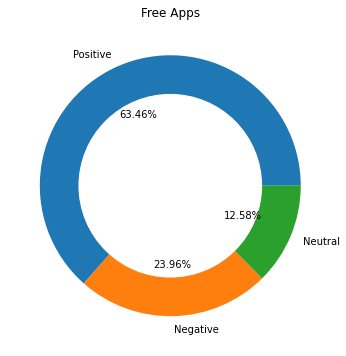

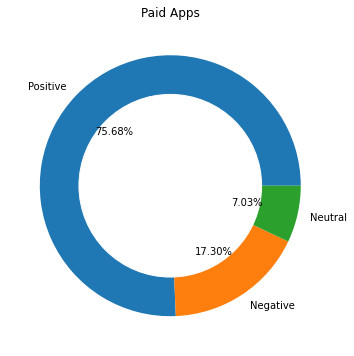

In [59]:
# Looking at the ratio of different sentiments for paid and free apps

free_apps = merged_df[merged_df["Type"] == "Free"]
paid_apps = merged_df[merged_df["Type"] == "Paid"]
for i in [free_apps,paid_apps]:
  plt.figure(figsize=(10,6))
  plt.title(i.Type.unique()[0]+' Apps')
  plt.pie(i.Sentiment.value_counts(),labels=i.Sentiment.value_counts().index, autopct='%1.2f%%')
  my_circle=plt.Circle( (0,0), 0.7, color='white')
  p=plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

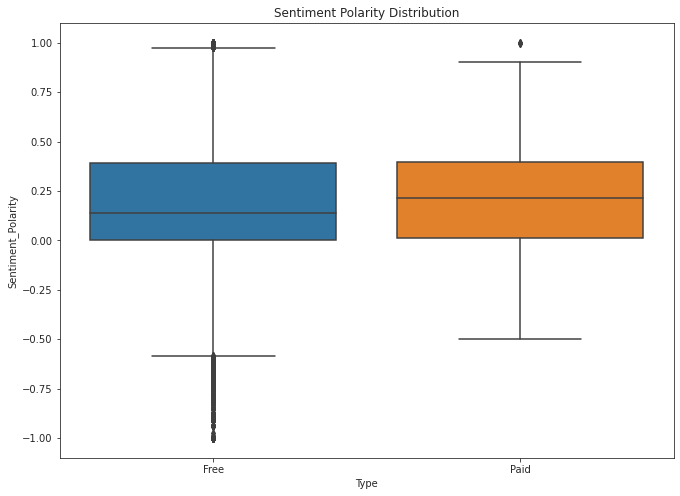

In [60]:
# Plotting sentiment polarity scores of user reviews for paid and free apps

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

### From above two univariate and bivariate plots on sentiment polarity vs type, we can observe that users gave more positive sentiments, for paid apps, while looking at the outliers of box plot we can say that they were more harsh while giving reviews for free apps. It means paid apps have high quality than of free apps in general. Also, it can be inferred that neutral sentiments are less for paid ones i.e users are true to reviews once they have paid for it.




## Which category of apps have got more number of reveiws with positive sentiments?

Text(0, 0.5, 'Review Counts')

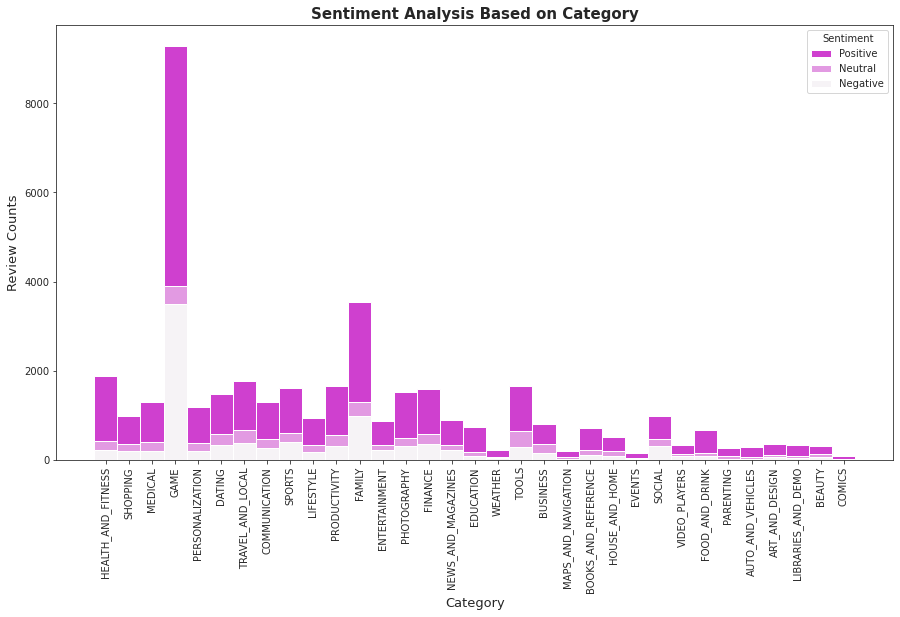

In [61]:
# Performing Sentiment analysis based on category

f = plt.figure(figsize=(15,8))
sns.histplot(
    merged_df,
    x="Category", hue="Sentiment",
    bins=34,
    stat="count",
    multiple="stack",
    palette="light:m_r",
    legend=True
    )


plt.title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel("Category",fontsize=13)
plt.ylabel("Review Counts",fontsize=13)

### The above graph clearly shows that users gave maximum reviews for game category followed by family. Also the positive and negative setiments are highest for games category.

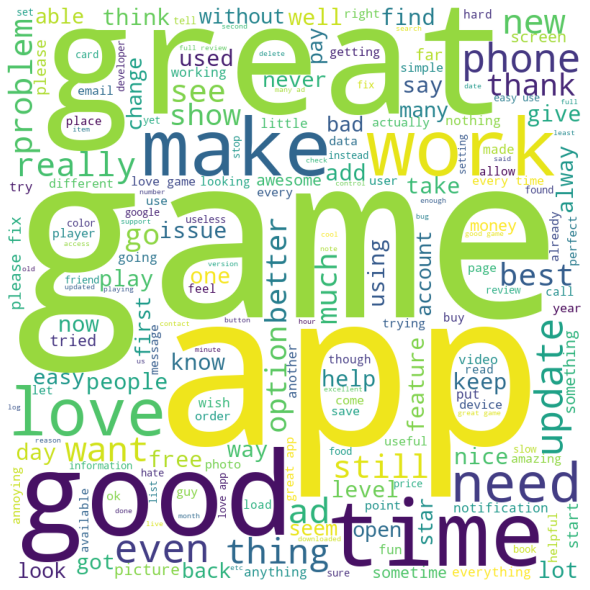

In [62]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df2.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

                
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


# **Conclusion**

The marketplace is crowded with all types of mobile apps as it has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 

Today, even businesses who never would’ve needed apps in the past are getting into the game to meet customer demand for an app that makes their lives easier or to stay ahead of the tech curve.

Thus, through this exhaustive analysis of approx. 10k apps we discovered following **key factors responsible for app engagement and success in recent study:**

  

1.   We found that among 33 unique app categories present in our dataset, apps related to **Games and Medical have the highest market prevalence** according to their ratings though there are greater number of apps related to family and tools as well.
2.   But, the **number of installs are higher for Communication, Social and productivity** genres whereas **Tools, Entertainment, Education related genres have maximum number of apps among all 119 genres.**
3. It was interesting to note that 
  * **Users have paid more for lite and high rating apps.** 
  * **Users have installed more apps of the ones having high reviews**
  * **Installs of app doesn't depends on Size.**
4. From the sentiment analysis we found **users showed more positive sentiments for paid apps and were harsh while showing sentiments for free apps.** Also, Neutral sentiments were less for paid ones i.e users were true to reviews once they have paid for it.
5. Users gave **maximum reviews for game category** followed by family. Also, the positive and negative sentiments were highest for games category.



   